## Importing Libraries
 

In [140]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


from sklearn.model_selection import train_test_split, GridSearchCV



## read our data and understand it

In [141]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

combine = [train_df , test_df]

In [142]:
print(train_df.columns)

print('-'*20)

print(test_df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [143]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [145]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).


In [146]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Data analysis

In [147]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Analyze by pivoting features


survival rate by class


In [148]:
train_df[['Survived' , 'Pclass']].groupby('Pclass', as_index=False).mean().sort_values(by = 'Survived' , ascending= False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


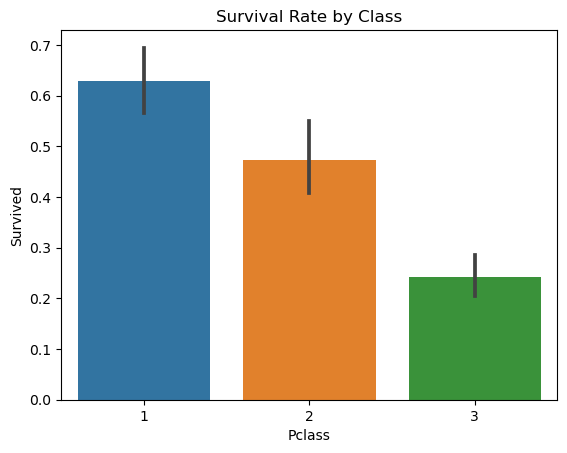

In [149]:
sns.barplot(x='Pclass' , y = 'Survived' , data = train_df)
plt.title('Survival Rate by Class')
plt.show()

survival rate by gender


In [150]:
train_df[['Survived' , 'Sex']].groupby('Sex', as_index=False).mean().sort_values(by = 'Survived' , ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


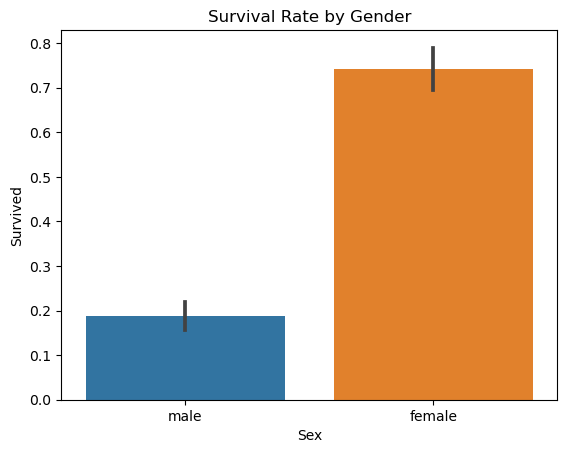

In [151]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()


In [152]:
train_df[['Survived','SibSp']].groupby('SibSp' , as_index= False).mean().sort_values(by = 'Survived' , ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [153]:
train_df[['Survived','Parch']].groupby('Parch' , as_index= False).mean().sort_values(by = 'Survived' , ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


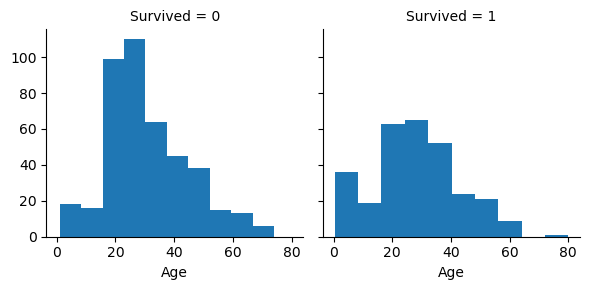

In [154]:
sns.FacetGrid(train_df , col ='Survived').map(plt.hist , 'Age')

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


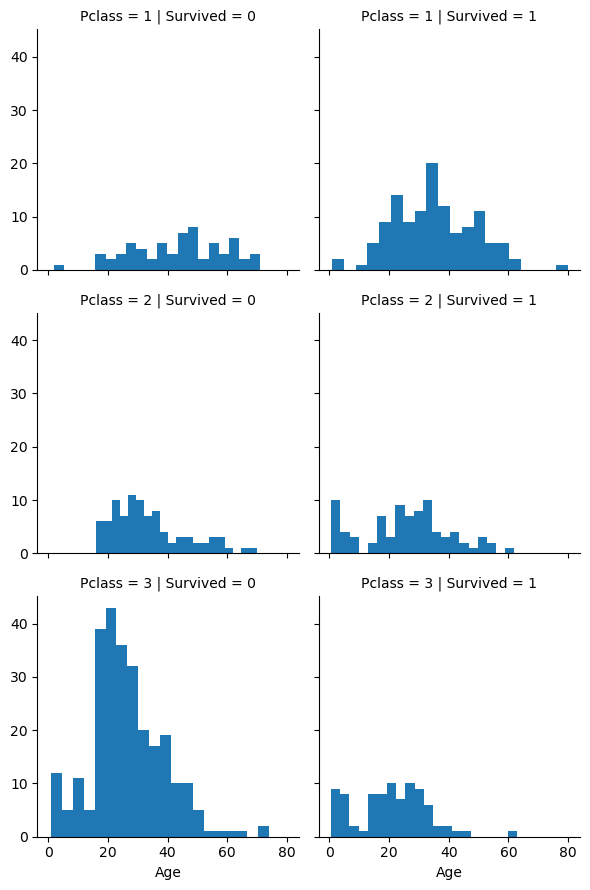

In [155]:
sns.FacetGrid(train_df , col ='Survived' , row = 'Pclass').map(plt.hist , 'Age' , bins = 20)

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


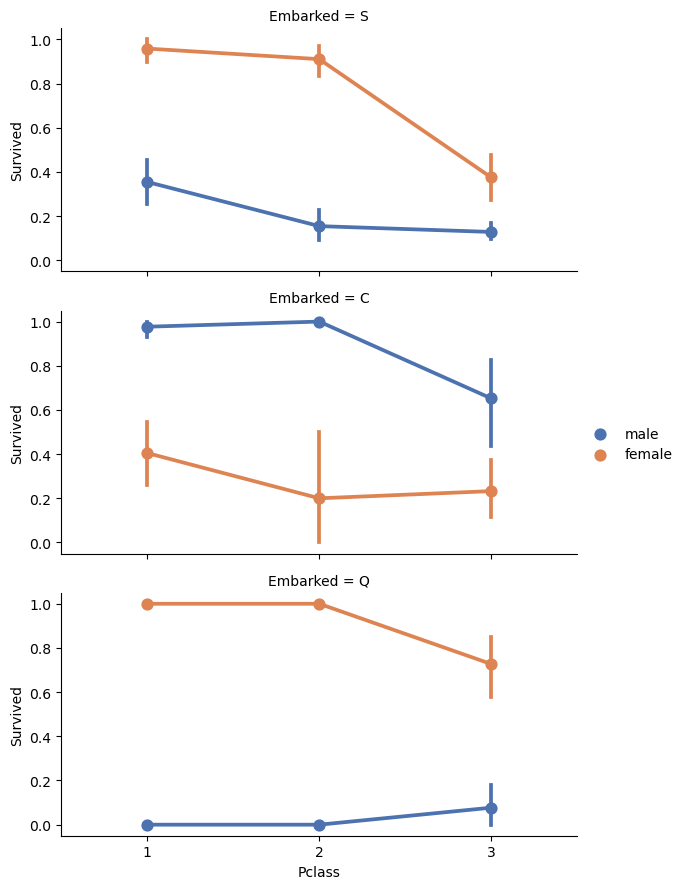

In [156]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` para

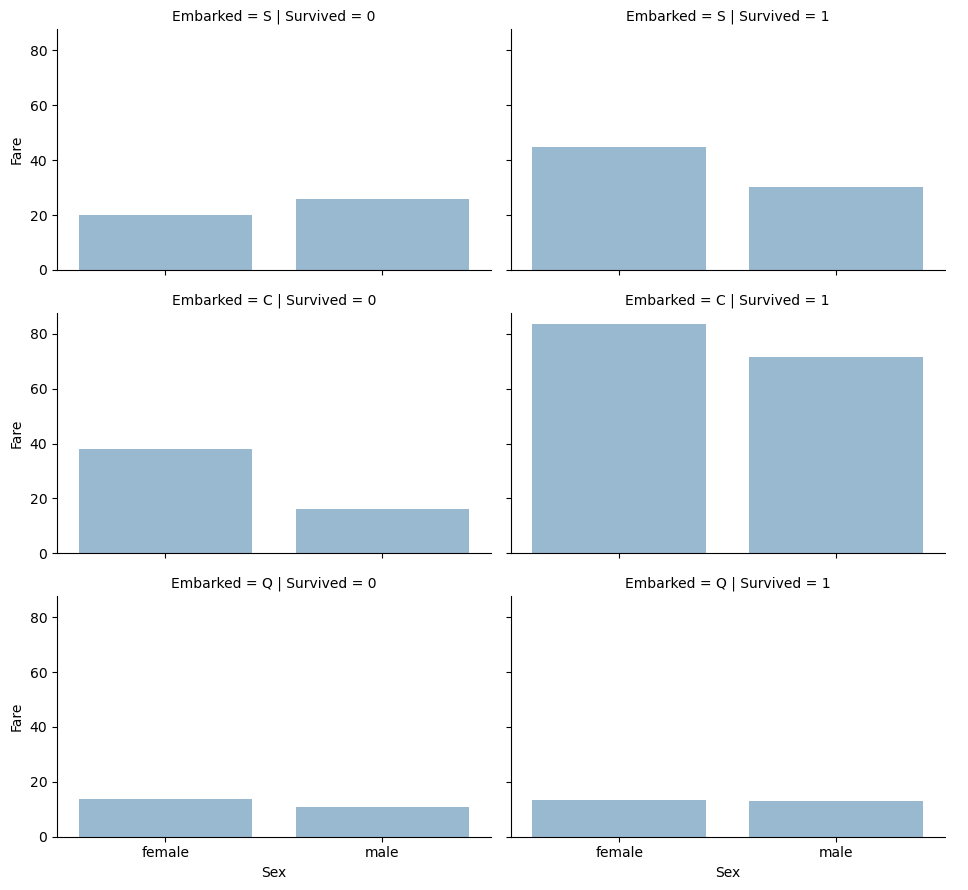

In [157]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Drop unused columns 


In [158]:
train_df['Sex']=train_df['Sex'].astype('category')
print(train_df['Sex'].value_counts())



Sex
male      577
female    314
Name: count, dtype: int64


In [159]:
print('Before: ' , train_df.shape , test_df.shape ,  combine[0].shape,combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin' , 'Name' , 'PassengerId'], axis =1)
test_df = test_df.drop(['Ticket', 'Cabin','Name' ], axis =1)
combine = [train_df, test_df]

"After: " , train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before:  (891, 12) (418, 11) (891, 12) (418, 11)


('After: ', (891, 8), (418, 8), (891, 8), (418, 8))

### Convert Sex into 0,1 


In [160]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1 , 'male':0})

train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


### Creating a new feature

##### We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.



In [161]:
for dataset in combine: 
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [162]:
train_df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

We can create another feature called IsAlone.


In [163]:
for dataset in combine:
    dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)

train_df[['IsAlone' , 'Survived']].groupby(['IsAlone'] , as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


so lets drop FamilySize , Parch , SibSp in favor of IsAlone


In [164]:
train_df = train_df.drop(['FamilySize' , 'Parch' , 'SibSp'], axis =1)
test_df = test_df.drop(['FamilySize' , 'Parch' , 'SibSp'], axis =1)
combine = [test_df , train_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,S,0
1,1,1,1,38.0,71.2833,C,0
2,1,3,1,26.0,7.9250,S,1
3,1,1,1,35.0,53.1000,S,0
4,0,3,0,35.0,8.0500,S,1


check for NaN values


In [165]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
IsAlone       0
dtype: int64

In [166]:
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [167]:
for dataset in combine:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


In [168]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
IsAlone        0
dtype: int64

In [169]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [170]:
test_df['Fare'].fillna(train_df['Fare'].median(),inplace=True)

In [171]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
IsAlone        0
dtype: int64

In [172]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,S,0
1,1,1,1,38.0,71.2833,C,0
2,1,3,1,26.0,7.9250,S,1
3,1,1,1,35.0,53.1000,S,0
4,0,3,0,35.0,8.0500,S,1


convert categorial into numric values


In [173]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0 , 'C':1 , 'Q':2})

In [174]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].astype('float')

In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   IsAlone      418 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 21.4 KB


In [176]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0.0,34.5,7.8292,2,1
1,893,3,1.0,47.0,7.0000,0,0
2,894,2,0.0,62.0,9.6875,2,1
3,895,3,0.0,27.0,8.6625,0,1
4,896,3,1.0,22.0,12.2875,0,0


In [177]:

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random forest model


In [178]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_randomForst = random_forest.predict(X_test)
print(random_forest.score(X_test, y_test))
print(20*'-')

print(confusion_matrix(y_test, y_pred_randomForst))
print(20*'-')
print(classification_report(y_test, y_pred_randomForst))




0.8100558659217877
--------------------
[[89 16]
 [18 56]]
--------------------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



logistic regression model


In [179]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg =log_reg.predict(X_test)
print(log_reg.score(X_test,y_test))
print(20*'-')
print(confusion_matrix(y_test, y_pred_log_reg))
print(20*'-')
print(classification_report(y_test, y_pred_log_reg))


0.7988826815642458
--------------------
[[89 16]
 [20 54]]
--------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Support Vector Machine


In [180]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc= svc.predict(X_test)
print(svc.score(X_test,y_test))
print(20*'-')
print(confusion_matrix(y_test, y_pred_svc))
print(20*'-')
print(classification_report(y_test, y_pred_svc))

0.6536312849162011
--------------------
[[99  6]
 [56 18]]
--------------------
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



Decision Tree Classifier Model


In [181]:
DecisionTree= DecisionTreeClassifier()
DecisionTree.fit(X_train , y_train)
y_pred_DicisionTree = DecisionTree.predict(X_test)
print(DecisionTree.score(X_test,y_pred_DicisionTree))
print(20*'-')
print(confusion_matrix(y_test,y_pred_DicisionTree))
print(20*'-')
print(classification_report(y_test,y_pred_DicisionTree))

1.0
--------------------
[[82 23]
 [17 57]]
--------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



Gradient Boosting Model


In [182]:
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train,y_train)
y_pred_GradientBoosting = GradientBoosting.predict(X_test)
print(GradientBoosting.score(X_test,y_pred_GradientBoosting))
print(20*'-')
print(confusion_matrix(y_test,y_pred_GradientBoosting))
print(20*'-')
print(classification_report(y_test,y_pred_GradientBoosting))

1.0
--------------------
[[94 11]
 [22 52]]
--------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



KNN Model


In [183]:
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_predKNN = KNN.predict(X_test)
print(KNN.score(X_test,y_predKNN))
print(20*'-')
print(confusion_matrix(y_test,y_predKNN))
print(20*'-')
print(classification_report(y_test,y_predKNN))


1.0
--------------------
[[88 17]
 [37 37]]
--------------------
              precision    recall  f1-score   support

           0       0.70      0.84      0.77       105
           1       0.69      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



GaussianNB Model


In [184]:
GaussianNB= GaussianNB()
GaussianNB.fit(X_train,y_train)
y_pred_NB=GaussianNB.predict(X_test)
print(GaussianNB.score(X_test,y_pred_NB))
print(20*'-')
print(confusion_matrix(y_test,y_pred_NB))
print(20*'-')
print(classification_report(y_test,y_pred_NB))

1.0
--------------------
[[85 20]
 [20 54]]
--------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

